# Unit 3 Classwork

The goals of this assignment are to help you (1) calculate expectations of random variables using R, (2) simulate probabilistic processes, and (3) estimate probabilities and other quantities through numerical (computer) simulation. Such simulations can be useful. We can use simulations to help confirm that we've calculated a probability "by hand" correctly, or to estimate other quantities, like areas/integrals!

## Problem #1

**1.(a) Write a function to calculate the expected value of a binomial random variable, using the definition of expectation. In other words, if $X \sim \text{Bin}(n, p)$, your function should take $n$ and $p$ as inputs, and return $E[X]$.**



In [5]:
bin_exp = function(n,p){
    x = 0:n
    expectation = sum(x*dbinom(x,n,p))
    return(expectation)
}

bin_exp(100,0.9)

[1] 90

**1.(b) Store $m = 10,000$ binomial random numbers in a vector `x`. Each entry of `x` should represent the number of heads in $50$ flips of a biased coin (where $P(\text{Heads}) = 0.75$).**

In [6]:
n =  50
p = 0.75
m = 10000

x = rbinom(m,n,p)
head(x,20)

[1] 35 38 38 38 40 29 34 40 36 40 32 37 39 40 36 41 35 34 40 37

**(c) Calculate the (sample) mean of `x`. Then, use the formula for the mean of a binomial, and the function above, to calculuate the mean of the random variable $X$, where $X$ counts the number of tails in 50 flips of a biased coin (again, $P(\text{Heads}) = 0.75$). What do you notice? Do these answers match?**

In [7]:
# computing the sample mean
mean(x)

#computing n*p
n*p

# use the function we wrote in part A
bin_exp(n,p)

[1] 37.4907

[1] 37.5

[1] 37.5

The formula $E[X] = n \cdot p$ and the function `bin_exp()` both yield the same value, since the latter can compute this value very accurately given that $X$ is a discrete random variable. However, the sample mean is slightly different, since it comes from a random sampling of $X$.

## Problem #2 

**2.(a) First, write a function to calculate the expected value of an exponential random variable for an arbitrary $\lambda$. Then, use it to compute the expected value $E[X]$, where $X \sim \text{Exp}(1/4)$. Hint: first make a function `integrand()` which takes a vector `x` and `lambda` as arguments, and then pass it to the `integrate()` function in `R`.**

In [7]:
integrand = function(x,lambda){
    fx = x*dexp(x,lambda)
    return(fx)
}

exp_exp = function(l){
    I = integrate(integrand, lower = 0, upper = Inf, lambda = l)
    return(I)
}

exp_exp(1/4)

4 with absolute error < 1.2e-05

**2.(b) Consider the PDF $f(x) = \frac{3}{2}(1-x^2)$ on $0 \le x \le 1$ (zero elsewhere). Suppose that $f(x)$ is the PDF for a random variable $X$. Find $E[X^3]$.** (*Note*: you may do this in `R` using the integrate function, or by hand).

In [8]:
m = 100
x = seq(0,1,length.out = m)

f = function(x){
    f = x^3 * 3/2 * (1-x^2)
    return(f)
}
integrate(f,0,1)

0.125 with absolute error < 1.4e-15

**2.(c) Estimate $E[X^3]$ using Monte Carlo integration. How could you get a better estimate?**

In [9]:
m = 50000
x = runif(m,0,1)
y = runif(m,0,1)

below = sum(y<f(x))/m
below

[1] 0.12726

## Problem #3

In class, we emphasized that variables can be uncorrelated but dependent. Let's look at an example of this.

**3.(a) Generate $n = 5000$ random variables from a $\text{Unif}(-1,1)$ distribution. Store these values in `x`. Then, create a variable `y` such that $y = x^2$. Plot `x` and `y` and compute the (sample) correlation coefficient using `cor()`. What do you notice?**

[1] 0.01367169

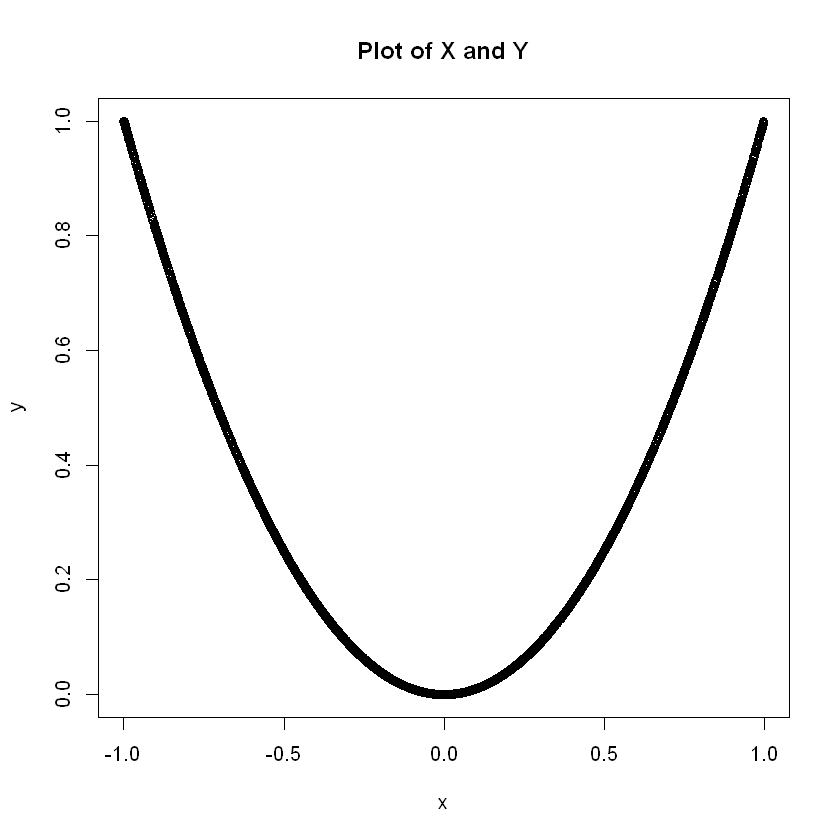

In [11]:
set.seed(27)
n = 5000
x = runif(n,-1,1)
y = x^2
plot(x,y,main="Plot of X and Y")
corr_coef = cor(x,y)
corr_coef

The y = x^2 function makes all values positive and it will create a parabola out of it. The correlation coefficient here will be close to 0 and it indicates that there won't be any linear relationship between x and y so there won't be any correlation here.

**3.(b) Now add various degrees of "noise" to `y`, by adding random normal numbers to the `y` equation. Use `rnorm(n,0,b)`, where `b` is set to values like `0.01`, `0.1`, and `1`. What do you notice about the plot and corresponding correlation coefficient?**

[1] 0.01321228

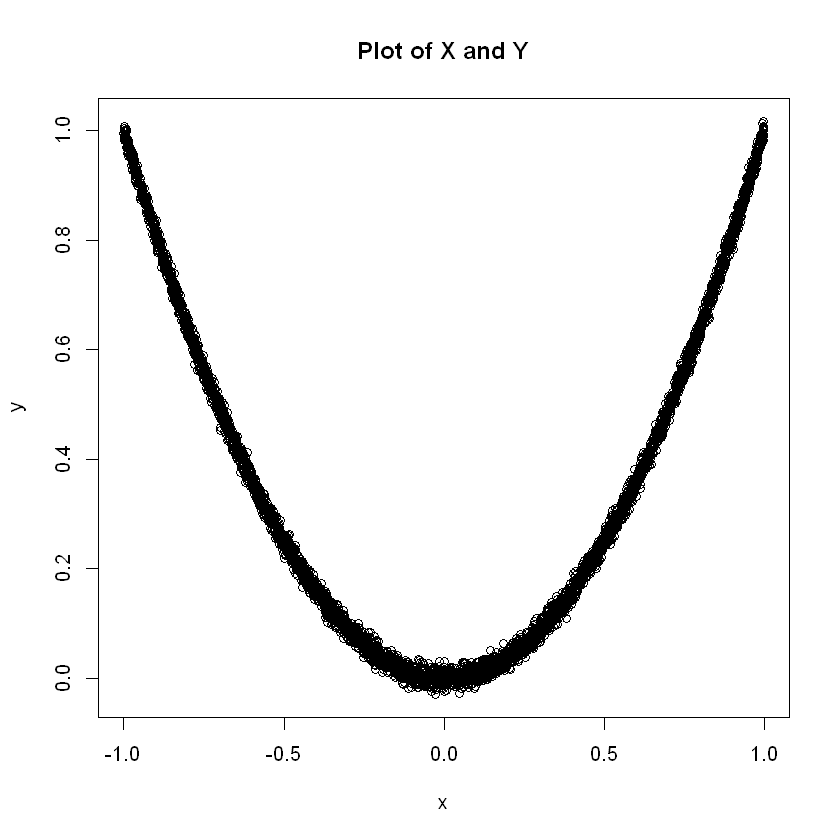

In [12]:
set.seed(27)
n = 5000 
x = runif(n,-1,1)
y = x^2 + rnorm(n,0,0.01)
plot(x,y,main="Plot of X and Y")
corr_coef = cor(x,y)
corr_coef

[1] 0.00866511

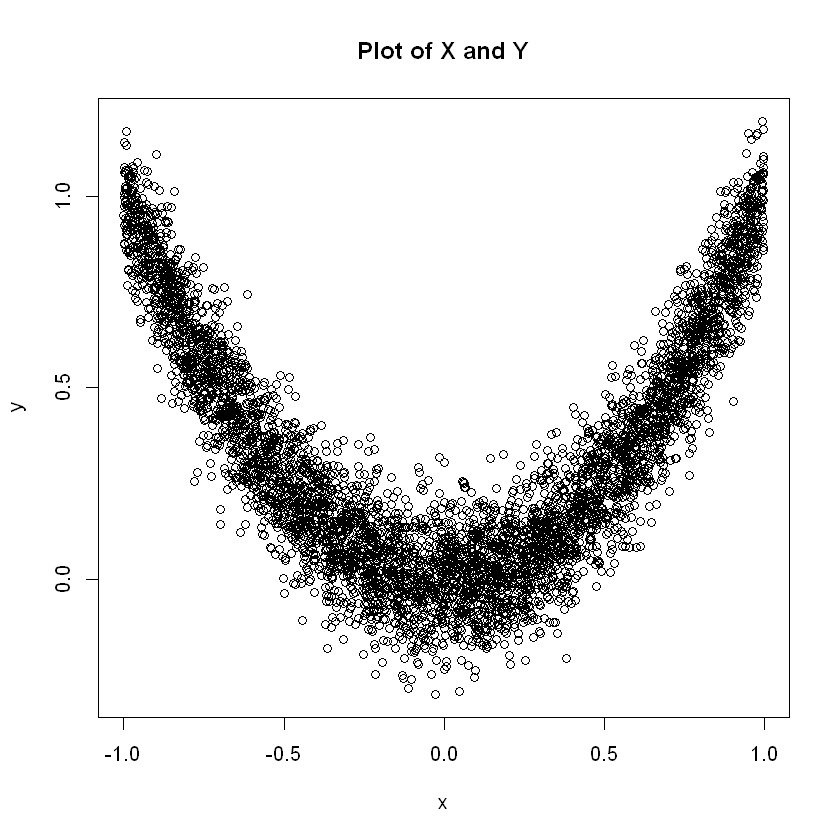

In [13]:
set.seed(27)
n = 5000 
x = runif(n,-1,1)
y = x^2 + rnorm(n,0,0.1)
plot(x,y,main="Plot of X and Y")
corr_coef = cor(x,y)
corr_coef

[1] -0.008939487

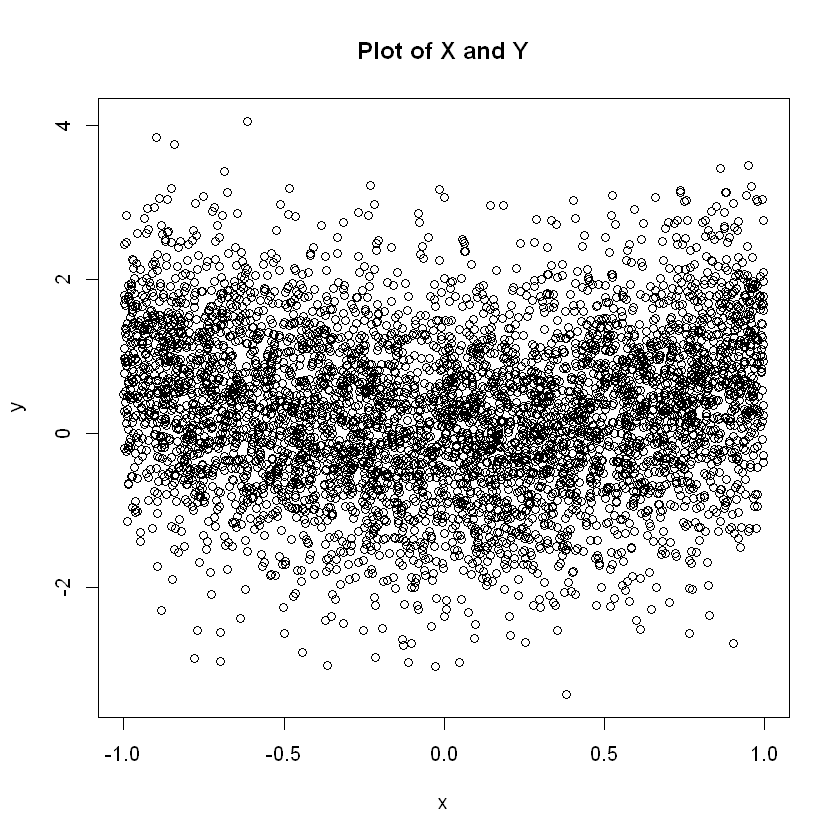

In [14]:
set.seed(27)
n = 5000 
x = runif(n,-1,1)
y = x^2 + rnorm(n,0,1)
plot(x,y,main="Plot of X and Y")
corr_coef = cor(x,y)
corr_coef

1. By adding the noise of '0.01' the pure parabolic curve become spoiled slightly, with very few points come out of the curve, the correlation coefficient is very close to 0 and the linear relationship b/w x and y is very weak.
2. In case of the noise '0.1' the parabolic curve is slightly visible but the points are scattered the spread of points are more around the curve. The linear correlation didn't improved but it's slightly reduced after increasing the noise and there isn't any linear relationship exists b/w x and y.
3. In case of the noise '1' the parabolic curve is no longer visible and only the scattered points at different parts of the plot is visible. The correlation coefficient turned negative but closer to '0' and it indicates that there is no relationship between the x and y even if we add up subsequent noise into it.